In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.float_format = '{:.6f}'.format
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, fcluster
from scipy.cluster.hierarchy import cophenet

plt.rcParams['figure.figsize'] = [12,7]

In [14]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               0                 0.000000              0   
2               0                 0.000000              0   
3               0                 0.000000              0   
4               0                 0.000000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                0.000000               1                 0.000000   
1                0.000000               2                64.000000   
2                0.000000               1                 0.000000   
3                0.000000               2                 2.666667   
4                0.000000              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000    0.000000    0.000000   Feb                 1   
1     0.000000   0.100000    0.000000    0.000000   Feb                 2   
2     0.200000   0.200000    0.000000    0.000000   Feb                 4   
3     0.050000   0.140000    0.000000    0.000000   Feb                 3   
4     0.020000   0.050000    0.000000    0.000000   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

       BounceRates    ExitRates   PageValues   SpecialDay  OperatingSystems  \
count 12330.000000 12330.000000 12330.000000 12330.000000      12330.000000   
mean      0.022191     0.043073     5.889258     0.061427          2.124006   
std       0.048488     0.048597    18.568437     0.198917          0.911325   
min       0.000000     0.000000     0.000000     0.000000          1.000000   
25%       0.000000     0.014286     0.000000     0.000000          2.000000   
50%       0.003112     0.025156     0.000000     0.000000          2.000000   
75%       0.016813     0.050000     0.000000     0.000000          3.000000   
max       0.200000     0.200000   361.763742     1.000000          8.000000   

           Browser       Region  TrafficType  
count 12330.000000 12330.000000 12330.000000  
mean      2.357097     3.147364     4.069586  
std       1.717277     2.401591     4.025169  
min       1.000000     1.000000     1.000000  
25%       2.000000     1.000000     2.000000  
50%       2.000000     3.000000     2.000000  
75%       2.000000     4.000000     4.000000  
max      13.000000     9.000000    20.000000

In [7]:
# Converting data types for categorical varibles to Object
for col in df.iloc[:,10:].columns:
    df[col] = df[col].astype('object')

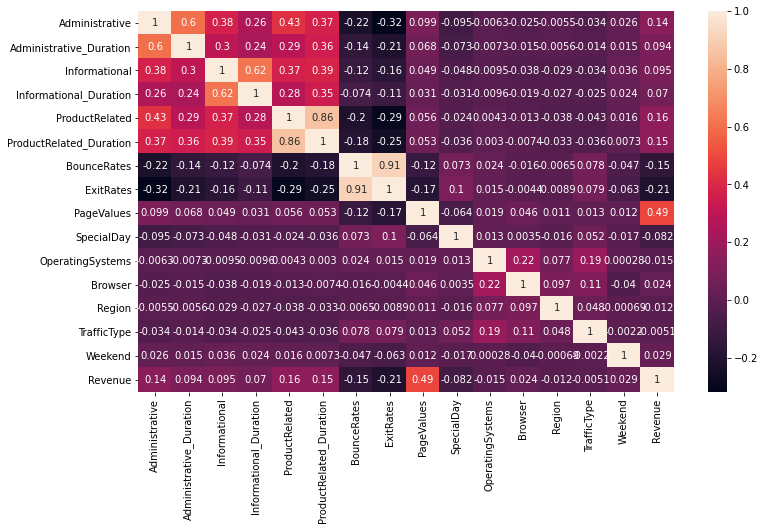

In [15]:
sns.heatmap(df.corr(), annot = True)
plt.show()

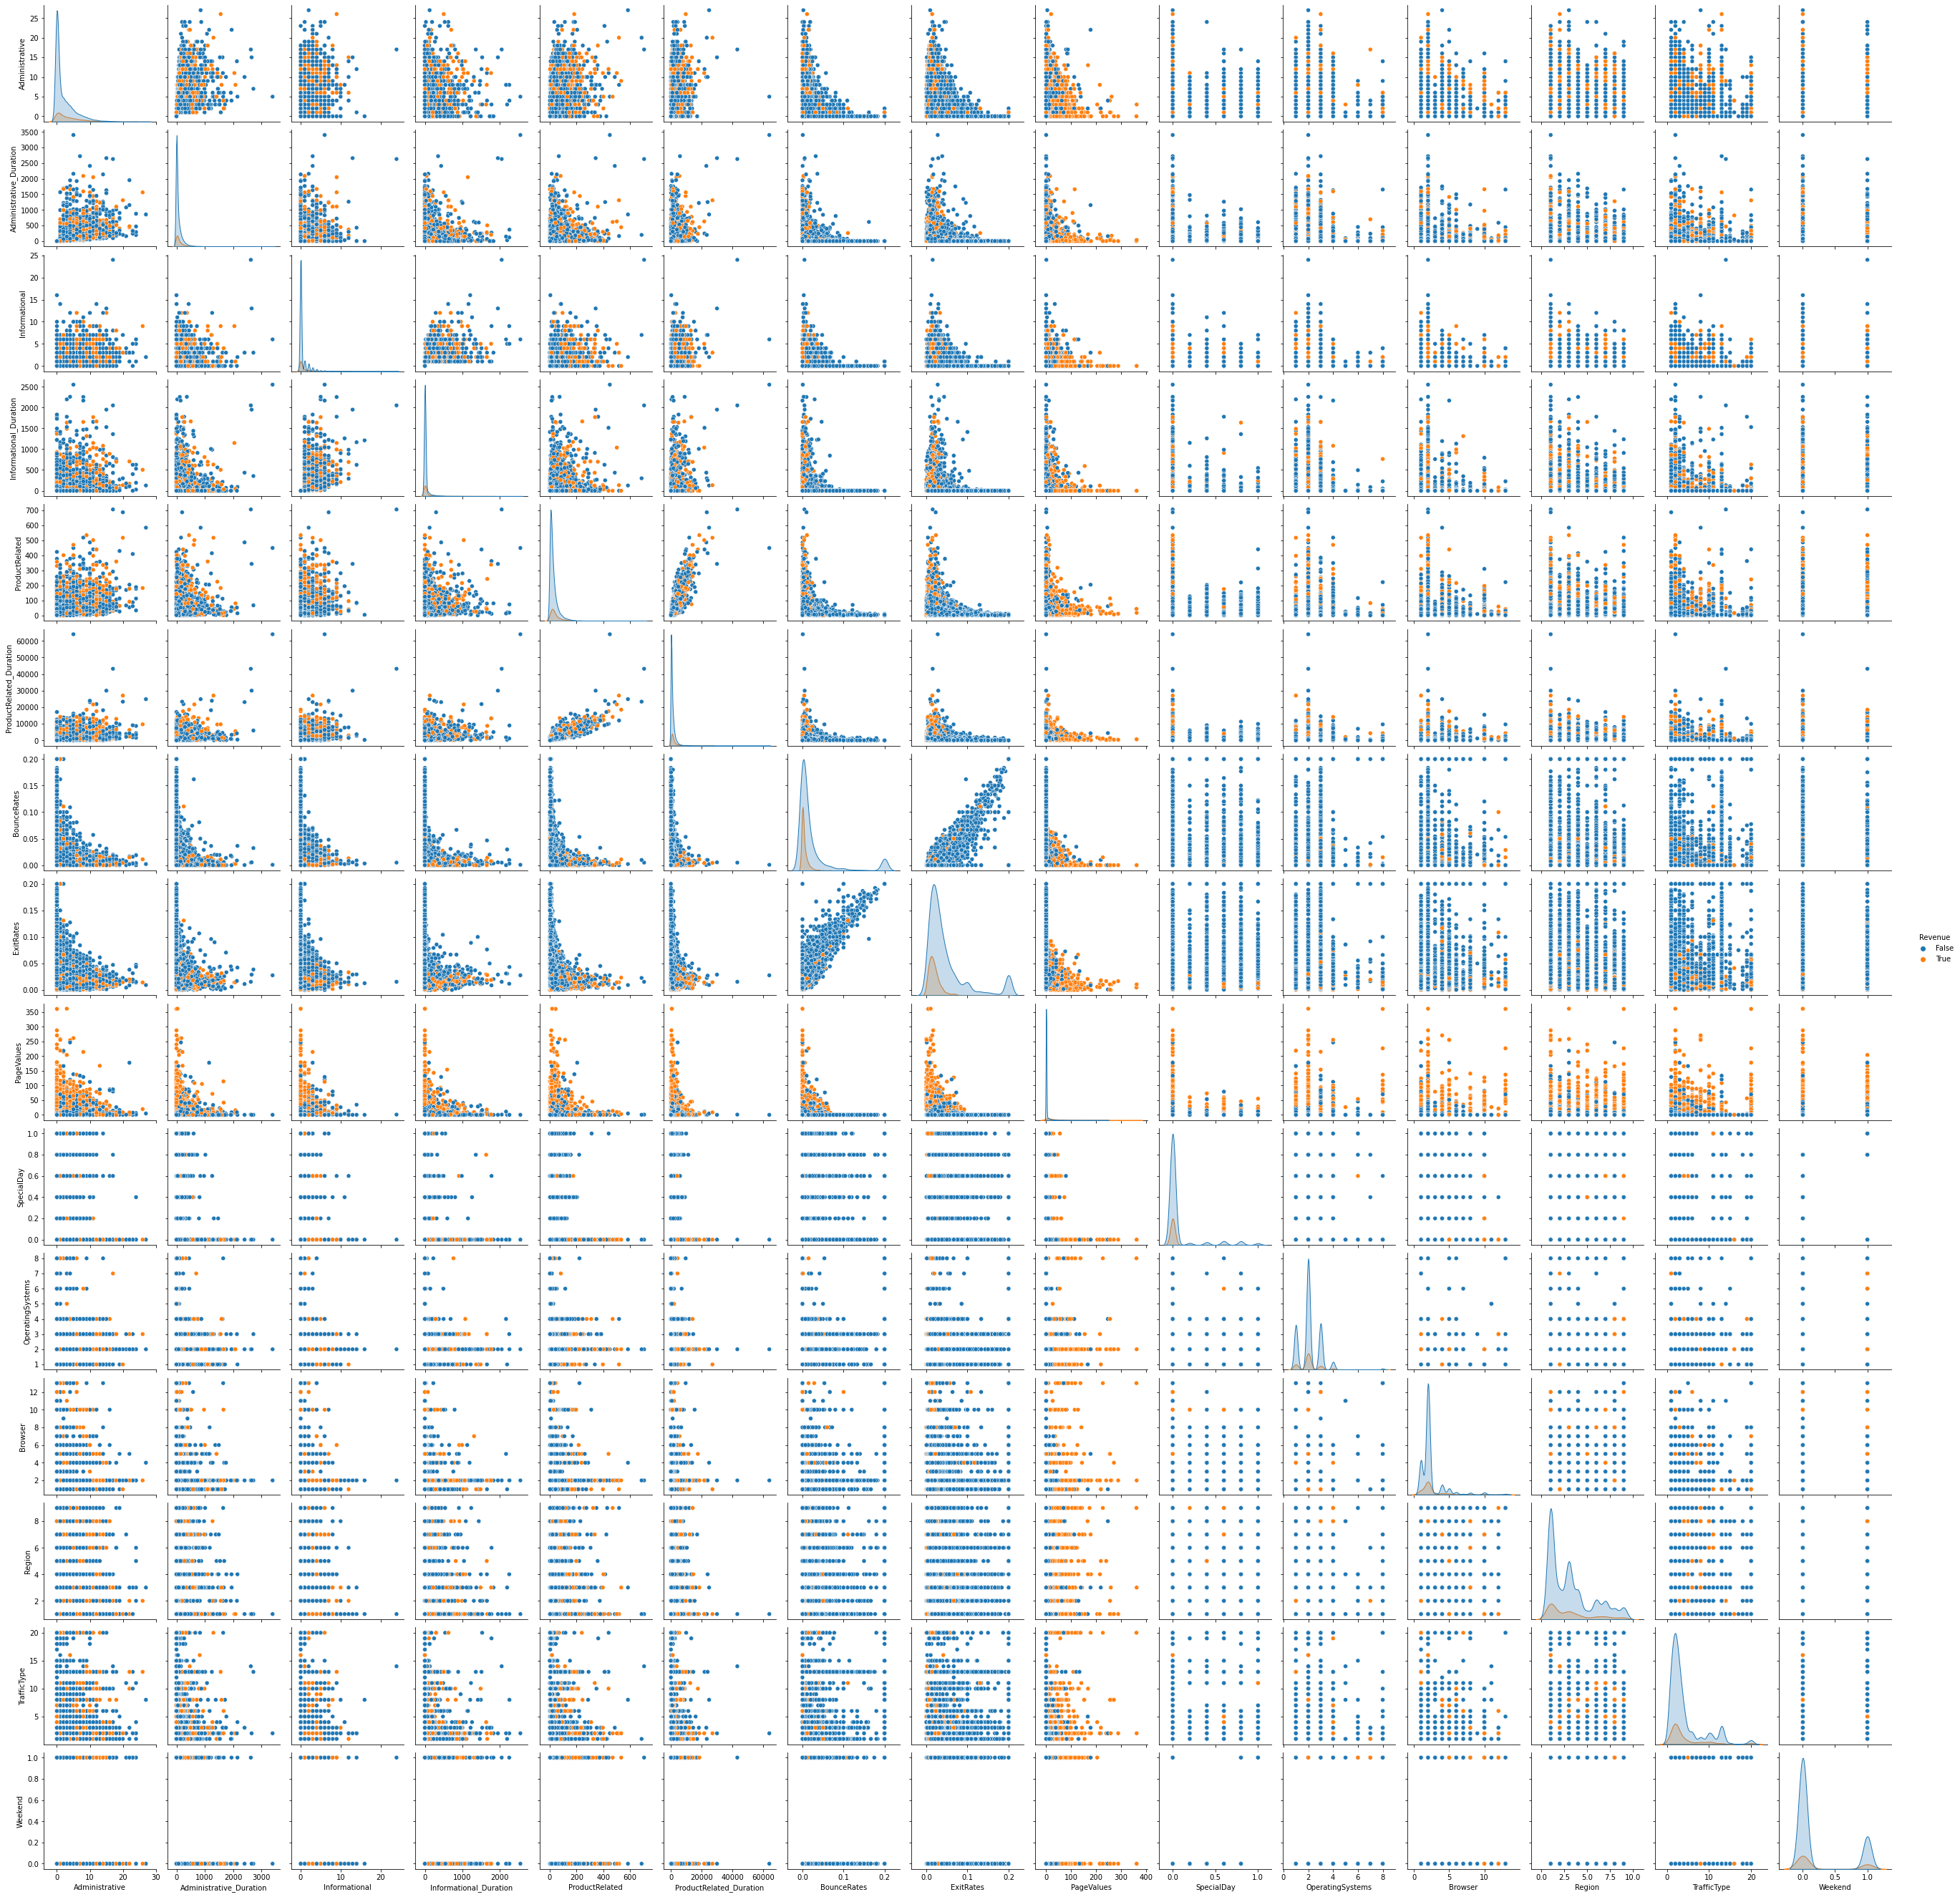

In [18]:
sns.pairplot(data=df,palette='tab10',  hue= 'Revenue')
plt.show()

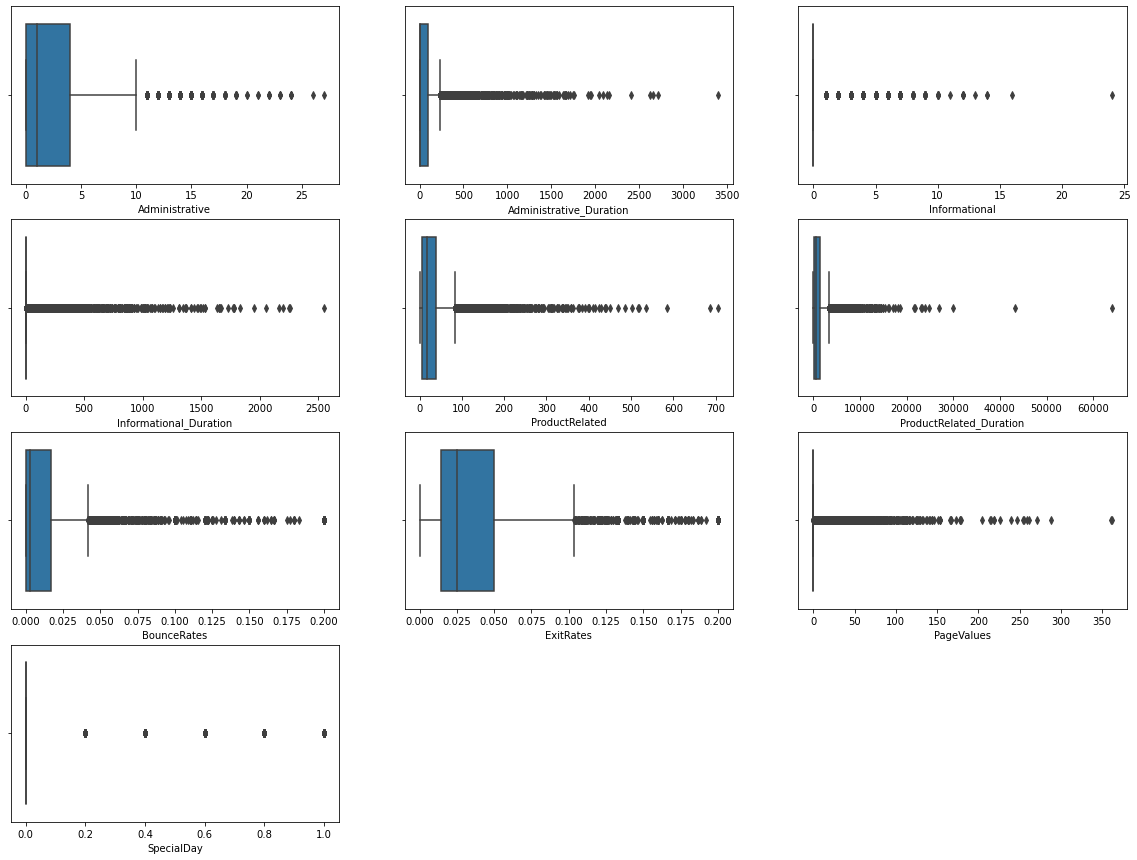

In [36]:
i = 1
for col in df.iloc[:,:10].columns:
    plt.subplot(4,3,i)
    sns.boxplot(df[col])
    i += 1

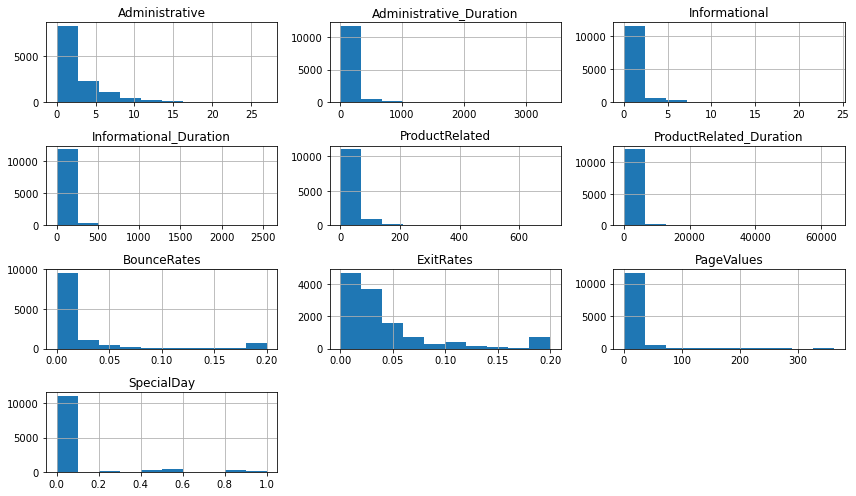

Administrative            1.960357
Administrative_Duration   5.615719
Informational             4.036464
Informational_Duration    7.579185
ProductRelated            4.341516
ProductRelated_Duration   7.263228
BounceRates               2.947855
ExitRates                 2.148789
PageValues                6.382964
SpecialDay                3.302667
OperatingSystems          2.066285
Browser                   3.242350
Region                    0.983549
TrafficType               1.962987
Weekend                   1.265962
Revenue                   1.909509
dtype: float64

In [13]:
df.hist()

plt.tight_layout()

plt.show()

df.skew()

In [17]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

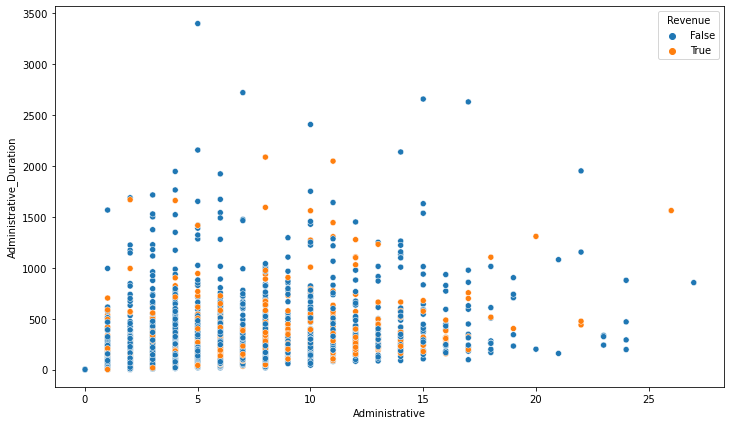

In [57]:
sns.scatterplot(data = df, x = 'Administrative', y = 'Administrative_Duration', hue = 'Revenue')

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

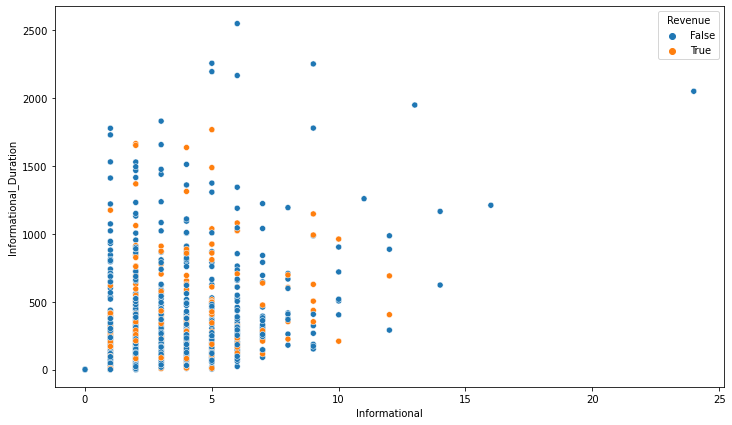

In [58]:
sns.scatterplot(data = df, x = 'Informational', y = 'Informational_Duration', hue = 'Revenue')

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

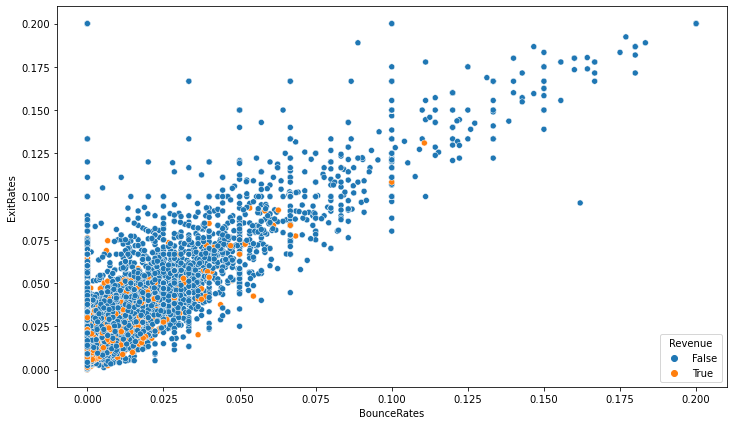

In [59]:
sns.scatterplot(data = df, x = 'BounceRates', y = 'ExitRates', hue = 'Revenue')

In [47]:
df1 = df.copy()
df1[['Weekend', 'Revenue']] = df1[['Weekend', 'Revenue']].astype('int')
df1['Weekend'] = df1['Weekend'].astype('object')
df1[['Weekend', 'Revenue']].replace(to_replace=[True, False], value=[1,0], inplace = True)
# Q1 = df1.quantile(0.25)
# Q3 = df1.quantile(0.75)
# IQR = Q3 - Q1
# # df1 = df1[~((df1 < (Q1 - 3.5 * IQR)) | (df1 > (Q3 + 3.5 * IQR))).any(axis=1)]
# df1 = df1[((df1 < (Q1 - 3.5 * IQR)) | (df1 > (Q3 + 3.5 * IQR))).any(axis=1)]
# df1 = df1.reset_index(drop=True)
# df1.shape

**Interpretation** We can see there are 9000 outliers for 3.5 whisker value if we drop these record we will loose very big amout of data so, as the USL algorithms are able to capture the outliers I am going with full data.

In [51]:
df_num = df1.drop('Revenue', axis = 1).select_dtypes(np.number)
df_num.shape

(12330, 14)

In [52]:
df_cat = df1.select_dtypes(object)
df_cat = pd.get_dummies(df_cat,drop_first=True)
df_cat.shape

(12330, 12)

In [87]:
df_final = pd.concat([df_num,df_cat],axis=1)
df_final.shape

(12330, 26)

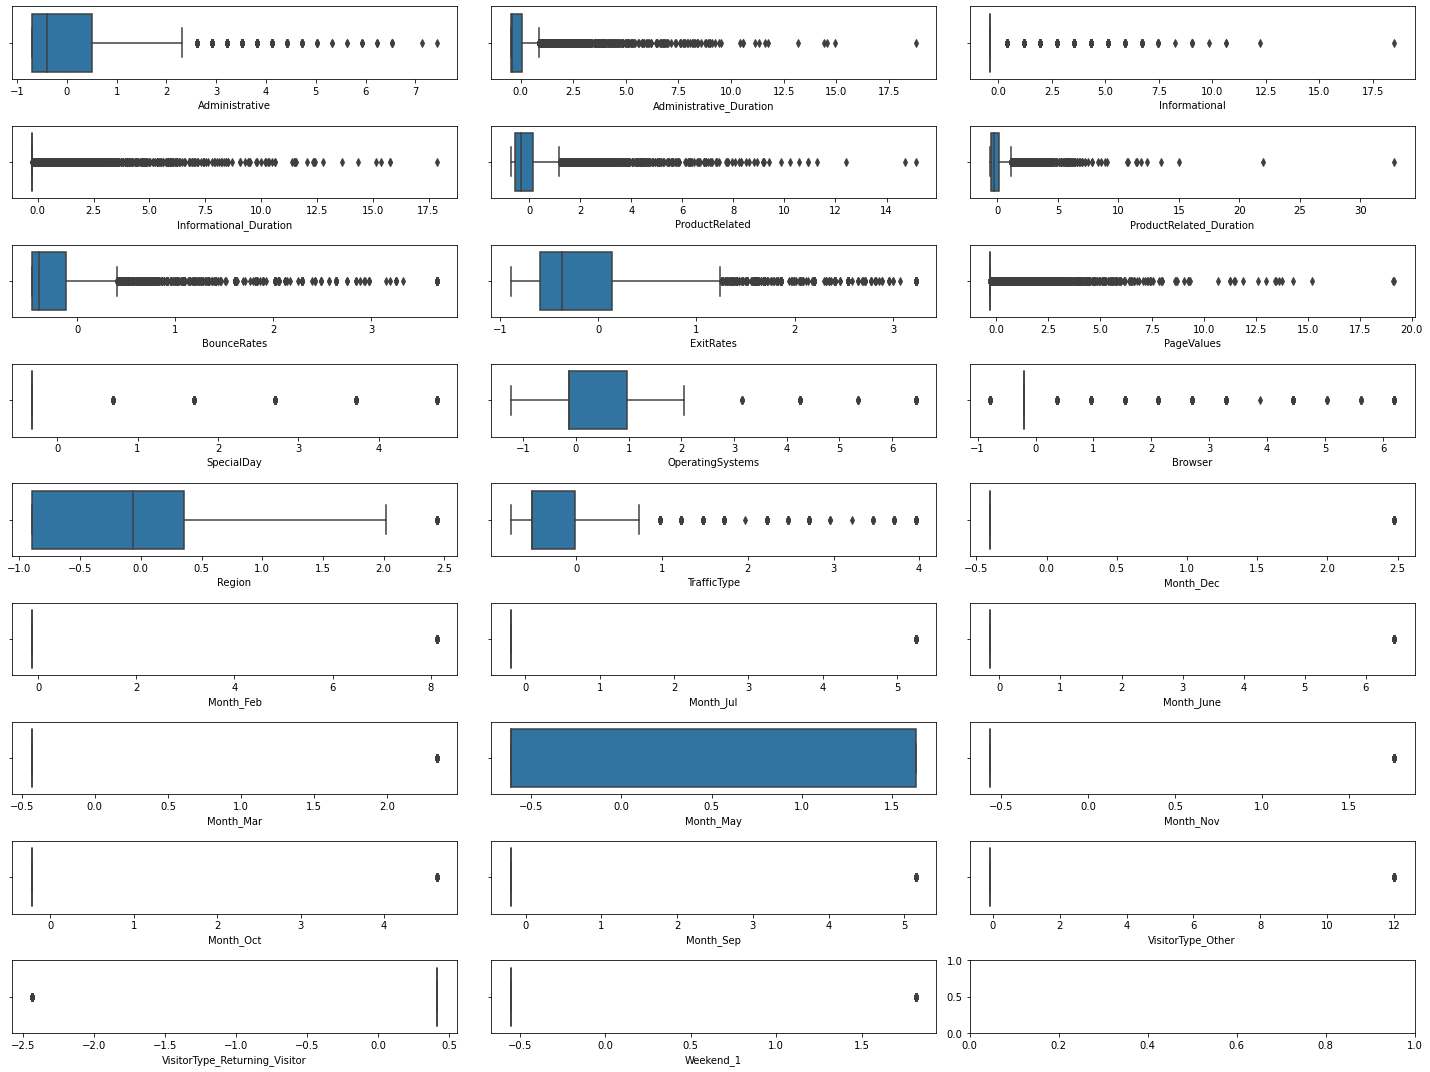

In [63]:
fig,ax = plt.subplots(nrows=9,ncols=3,figsize=(20,15))
for variable,subplot in zip(X.columns,ax.flatten()):
    
    sns.boxplot(X[variable],ax=subplot)
    
plt.tight_layout()
plt.show()

In [88]:
SS = StandardScaler()
X_scaled = SS.fit_transform(df_final)
X = pd.DataFrame(X_scaled, columns = X.columns)
X.shape

(12330, 26)

### K Means

In [89]:
wcss = []

for k in range(1,8):
    kmean = KMeans(n_clusters=k,random_state=10)
    kmean.fit(X)
    wcss.append(kmean.inertia_)   
wcss

[320579.9999999999,
 296370.19152782613,
 276444.03506452875,
 260686.91909370612,
 248593.18702200646,
 235413.8813254941,
 224396.80261457388]

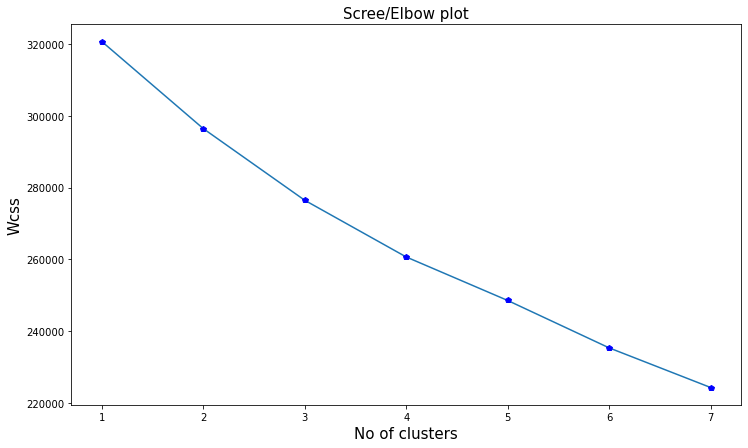

In [71]:
plt.plot(range(1,8), wcss)
plt.plot(range(1,8), wcss, 'bp')
plt.title('Scree/Elbow plot',fontsize=15)
plt.xlabel('No of clusters',fontsize=15)
plt.ylabel('Wcss',fontsize=15)

plt.show()

From the above Elbow plot we can consider 2 is optimal K value

In [77]:
n_clusters = [2,3,4,5,6,7]
silhouette_scores = []
for k in n_clusters:   
    cluster = KMeans(n_clusters=k,random_state=10)
    model = cluster.fit_predict(X)
    score = silhouette_score(X,model,random_state=10)
    silhouette_scores.append(score)
    print('For optmal {} clusters the silhouette score is {}'.format(k,score))

For optmal 2 clusters the silhouette score is 0.18645672944378106
For optmal 3 clusters the silhouette score is 0.17732383577173694
For optmal 4 clusters the silhouette score is 0.07977205766941967
For optmal 5 clusters the silhouette score is 0.10340641319287715
For optmal 6 clusters the silhouette score is 0.09120354843365462
For optmal 7 clusters the silhouette score is 0.13841799526556187


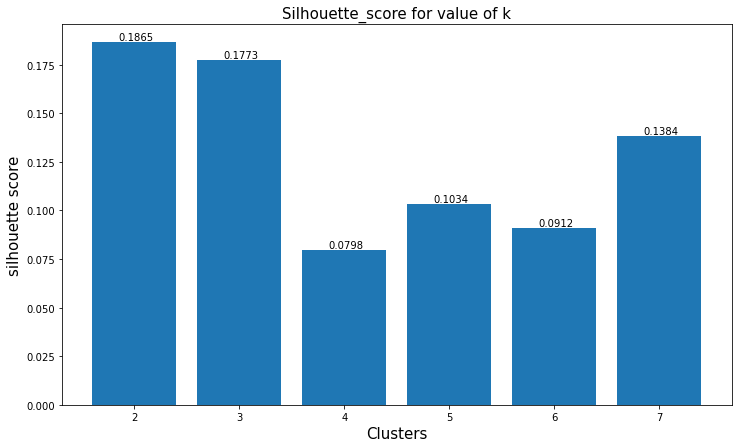

In [85]:
plt.bar(n_clusters,silhouette_scores)

for i in n_clusters:

    plt.text(x = i-0.15, y = silhouette_scores[i-2] + 0.001, s = round(silhouette_scores[i-2],4))

plt.title('Silhouette_score for value of k',fontsize=15)
plt.xlabel('Clusters',fontsize=15)
plt.ylabel('silhouette score',fontsize=15)

plt.show()

From the above silhouette scores the optimal of 2 clusters having highest score so we can consider 2 is optimal K value

In [170]:
k_model = KMeans(n_clusters=2,random_state=10)
k_model.fit(X)
df_final['Cluster_K'] = k_model.labels_
df_final.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               0                 0.000000              0   
2               0                 0.000000              0   
3               0                 0.000000              0   
4               0                 0.000000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                0.000000               1                 0.000000   
1                0.000000               2                64.000000   
2                0.000000               1                 0.000000   
3                0.000000               2                 2.666667   
4                0.000000              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Mar  Month_May  \
0     0.200000   0.200000    0.000000    0.000000  ...          0          0   
1     0.000000   0.100000    0.000000    0.000000  ...          0          0   
2     0.200000   0.200000    0.000000    0.000000  ...          0          0   
3     0.050000   0.140000    0.000000    0.000000  ...          0          0   
4     0.020000   0.050000    0.000000    0.000000  ...          0          0   

   Month_Nov  Month_Oct  Month_Sep  VisitorType_Other  \
0          0          0          0                  0   
1          0          0          0                  0   
2          0          0          0                  0   
3          0          0          0                  0   
4          0          0          0                  0   

   VisitorType_Returning_Visitor  Weekend_1  Cluster_K  Cluster_AgC  
0                              1          0          0            0  
1                              1          0          0            0  
2                              1          0          0            0  
3                              1          0          0            0  
4                              1          1          0            0  

[5 rows x 28 columns]

In [91]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [92]:
df_final['Cluster_K'].value_counts()

0    10393
1     1937
Name: Cluster_K, dtype: int64

**Interpretation** We can see the above value counts results of target variables and model labels 29 are missclassified in both categories that means we can that the K Means algorithm predicted almost correctly

In [95]:
cluster_centers = pd.DataFrame(k_model.cluster_centers_, columns =  (df_final.drop(['Cluster_K'], axis=1)).columns)      
cluster_centers

Administrative  Administrative_Duration  Informational  \
0       -0.267195                -0.220132      -0.254876   
1        1.432763                 1.180396       1.366701   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.197067       -0.250194                -0.233220   
1                1.056719        1.341599                 1.250580   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0     0.061077   0.090771   -0.041318    0.032629  ...   0.003088    0.000807   
1    -0.327511  -0.486734    0.221556   -0.174964  ...  -0.016559   -0.004329   

   Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  VisitorType_Other  \
0   0.031866   0.036888  -0.065451  -0.020392  -0.006986           0.012049   
1  -0.170871  -0.197802   0.350965   0.109347   0.037460          -0.064608   

   VisitorType_Returning_Visitor  Weekend_1  
0                      -0.044535  -0.010070  
1                       0.238806   0.054000  

[2 rows x 26 columns]

**Interpretation** Above are centroids of clusters for each feature

In [96]:
df_final[df_final['Cluster_K']==0].describe()

Administrative  Administrative_Duration  Informational  \
count    10393.000000             10393.000000   10393.000000   
mean         1.427499                41.901478       0.179833   
std          2.115042                79.921084       0.560684   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.000000                 0.000000       0.000000   
75%          2.000000                55.500000       0.000000   
max         14.000000               960.000000       6.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            10393.000000    10393.000000             10393.000000   
mean                 6.735811       20.613586               748.904736   
std                 33.485250       20.439471               866.072606   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        6.000000               140.700000   
50%                  0.000000       14.000000               453.900000   
75%                  0.000000       28.000000              1048.980263   
max                844.000000      159.000000              7515.583333   

       BounceRates    ExitRates   PageValues   SpecialDay  ...   Month_June  \
count 10393.000000 10393.000000 10393.000000 10393.000000  ... 10393.000000   
mean      0.025151     0.047481     5.121588     0.067911  ...     0.023477   
std       0.052176     0.051484    17.899996     0.208284  ...     0.151421   
min       0.000000     0.000000     0.000000     0.000000  ...     0.000000   
25%       0.000000     0.015278     0.000000     0.000000  ...     0.000000   
50%       0.002128     0.028571     0.000000     0.000000  ...     0.000000   
75%       0.020139     0.055000     0.000000     0.000000  ...     0.000000   
max       0.200000     0.200000   361.763742     1.000000  ...     1.000000   

         Month_Mar    Month_May    Month_Nov    Month_Oct    Month_Sep  \
count 10393.000000 10393.000000 10393.000000 10393.000000 10393.000000   
mean      0.166170     0.289233     0.215145     0.040316     0.035024   
std       0.372251     0.453428     0.410943     0.196708     0.183848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       VisitorType_Other  VisitorType_Returning_Visitor    Weekend_1  \
count       10393.000000                   10393.000000 10393.000000   
mean            0.007890                       0.840085     0.228327   
std             0.088478                       0.366545     0.419774   
min             0.000000                       0.000000     0.000000   
25%             0.000000                       1.000000     0.000000   
50%             0.000000                       1.000000     0.000000   
75%             0.000000                       1.000000     0.000000   
max             1.000000                       1.000000     1.000000   

         Cluster_K  
count 10393.000000  
mean      0.000000  
std       0.000000  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       0.000000  

[8 rows x 27 columns]

In [98]:
df[df['Revenue'] == False].describe()

Administrative  Administrative_Duration  Informational  \
count    10422.000000             10422.000000   10422.000000   
mean         2.117732                73.740111       0.451833   
std          3.202481               171.017970       1.211582   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.000000                 0.000000       0.000000   
75%          3.000000                83.000000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            10422.000000    10422.000000             10422.000000   
mean                30.236237       28.714642              1069.987809   
std                133.909306       40.744717              1803.797757   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        6.000000               151.000000   
50%                  0.000000       16.000000               510.190000   
75%                  0.000000       35.000000              1331.816667   
max               2549.375000      705.000000             63973.522230   

       BounceRates    ExitRates   PageValues   SpecialDay  OperatingSystems  \
count 10422.000000 10422.000000 10422.000000 10422.000000      10422.000000   
mean      0.025317     0.047378     1.975998     0.068432          2.129726   
std       0.051877     0.051231     9.072424     0.209054          0.907835   
min       0.000000     0.000000     0.000000     0.000000          1.000000   
25%       0.000000     0.015560     0.000000     0.000000          2.000000   
50%       0.004255     0.028571     0.000000     0.000000          2.000000   
75%       0.020000     0.053846     0.000000     0.000000          3.000000   
max       0.200000     0.200000   246.758590     1.000000          8.000000   

           Browser       Region  TrafficType  
count 10422.000000 10422.000000 10422.000000  
mean      2.339474     3.159278     4.078392  
std       1.681790     2.400493     4.032220  
min       1.000000     1.000000     1.000000  
25%       2.000000     1.000000     2.000000  
50%       2.000000     3.000000     2.000000  
75%       2.000000     4.000000     4.000000  
max      13.000000     9.000000    20.000000

In [99]:
df_final[df_final['Cluster_K']==1].describe()

Administrative  Administrative_Duration  Informational  \
count     1937.000000              1937.000000    1937.000000   
mean         7.077956               289.629020       2.240578   
std          4.396728               336.115391       2.237210   
min          0.000000                 0.000000       0.000000   
25%          4.000000                88.250000       0.000000   
50%          7.000000               190.583333       2.000000   
75%         10.000000               352.233333       3.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             1937.000000     1937.000000              1937.000000   
mean               183.293436       91.384615              3586.914801   
std                306.349979       78.297623              3535.918322   
min                  0.000000        1.000000                22.050000   
25%                  0.000000       38.000000              1474.233333   
50%                 64.500000       70.000000              2650.780526   
75%                222.000000      121.000000              4698.796429   
max               2549.375000      705.000000             63973.522230   

       BounceRates   ExitRates  PageValues  SpecialDay  ...  Month_June  \
count  1937.000000 1937.000000 1937.000000 1937.000000  ... 1937.000000   
mean      0.006310    0.019419   10.008202    0.026639  ...    0.022716   
std       0.007779    0.012151   21.346588    0.132960  ...    0.149034   
min       0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%       0.000388    0.011184    0.000000    0.000000  ...    0.000000   
50%       0.004021    0.017364    1.558381    0.000000  ...    0.000000   
75%       0.008889    0.025030   10.669370    0.000000  ...    0.000000   
max       0.080838    0.106667  255.569158    1.000000  ...    1.000000   

        Month_Mar   Month_May   Month_Nov   Month_Oct   Month_Sep  \
count 1937.000000 1937.000000 1937.000000 1937.000000 1937.000000   
mean     0.092927    0.184822    0.393392    0.067114    0.043366   
std      0.290405    0.388253    0.488629    0.250284    0.203732   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       VisitorType_Other  VisitorType_Returning_Visitor   Weekend_1  \
count        1937.000000                    1937.000000 1937.000000   
mean            0.001549                       0.939597    0.255550   
std             0.039334                       0.238293    0.436282   
min             0.000000                       0.000000    0.000000   
25%             0.000000                       1.000000    0.000000   
50%             0.000000                       1.000000    0.000000   
75%             0.000000                       1.000000    1.000000   
max             1.000000                       1.000000    1.000000   

        Cluster_K  
count 1937.000000  
mean     1.000000  
std      0.000000  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 27 columns]

In [100]:
df[df['Revenue'] == True].describe()

Administrative  Administrative_Duration  Informational  \
count     1908.000000              1908.000000    1908.000000   
mean         3.393606               119.483244       0.786164   
std          3.730527               201.114732       1.521176   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          2.000000                52.366667       0.000000   
75%          5.000000               151.083333       1.000000   
max         26.000000              2086.750000      12.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             1908.000000     1908.000000              1908.000000   
mean                57.611427       48.210168              1876.209615   
std                171.619131       58.267365              2312.214392   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000       15.000000               541.906250   
50%                  0.000000       29.000000              1109.906250   
75%                 19.000000       57.000000              2266.011310   
max               1767.666667      534.000000             27009.859430   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count  1908.000000 1908.000000 1908.000000 1908.000000       1908.000000   
mean      0.005117    0.019555   27.264518    0.023166          2.092767   
std       0.012185    0.016463   35.191954    0.123521          0.929779   
min       0.000000    0.000000    0.000000    0.000000          1.000000   
25%       0.000000    0.009521    3.641144    0.000000          2.000000   
50%       0.000000    0.016000   16.758134    0.000000          2.000000   
75%       0.006452    0.025000   38.897742    0.000000          2.000000   
max       0.200000    0.200000  361.763742    1.000000          8.000000   

          Browser      Region  TrafficType  
count 1908.000000 1908.000000  1908.000000  
mean     2.453354    3.082285     4.021488  
std      1.897042    2.407173     3.987140  
min      1.000000    1.000000     1.000000  
25%      2.000000    1.000000     2.000000  
50%      2.000000    2.000000     2.000000  
75%      2.000000    4.000000     4.000000  
max     13.000000    9.000000    20.000000

In [174]:
df1 = df_num.copy()
df1['Cluster_K'] = k_model.labels_

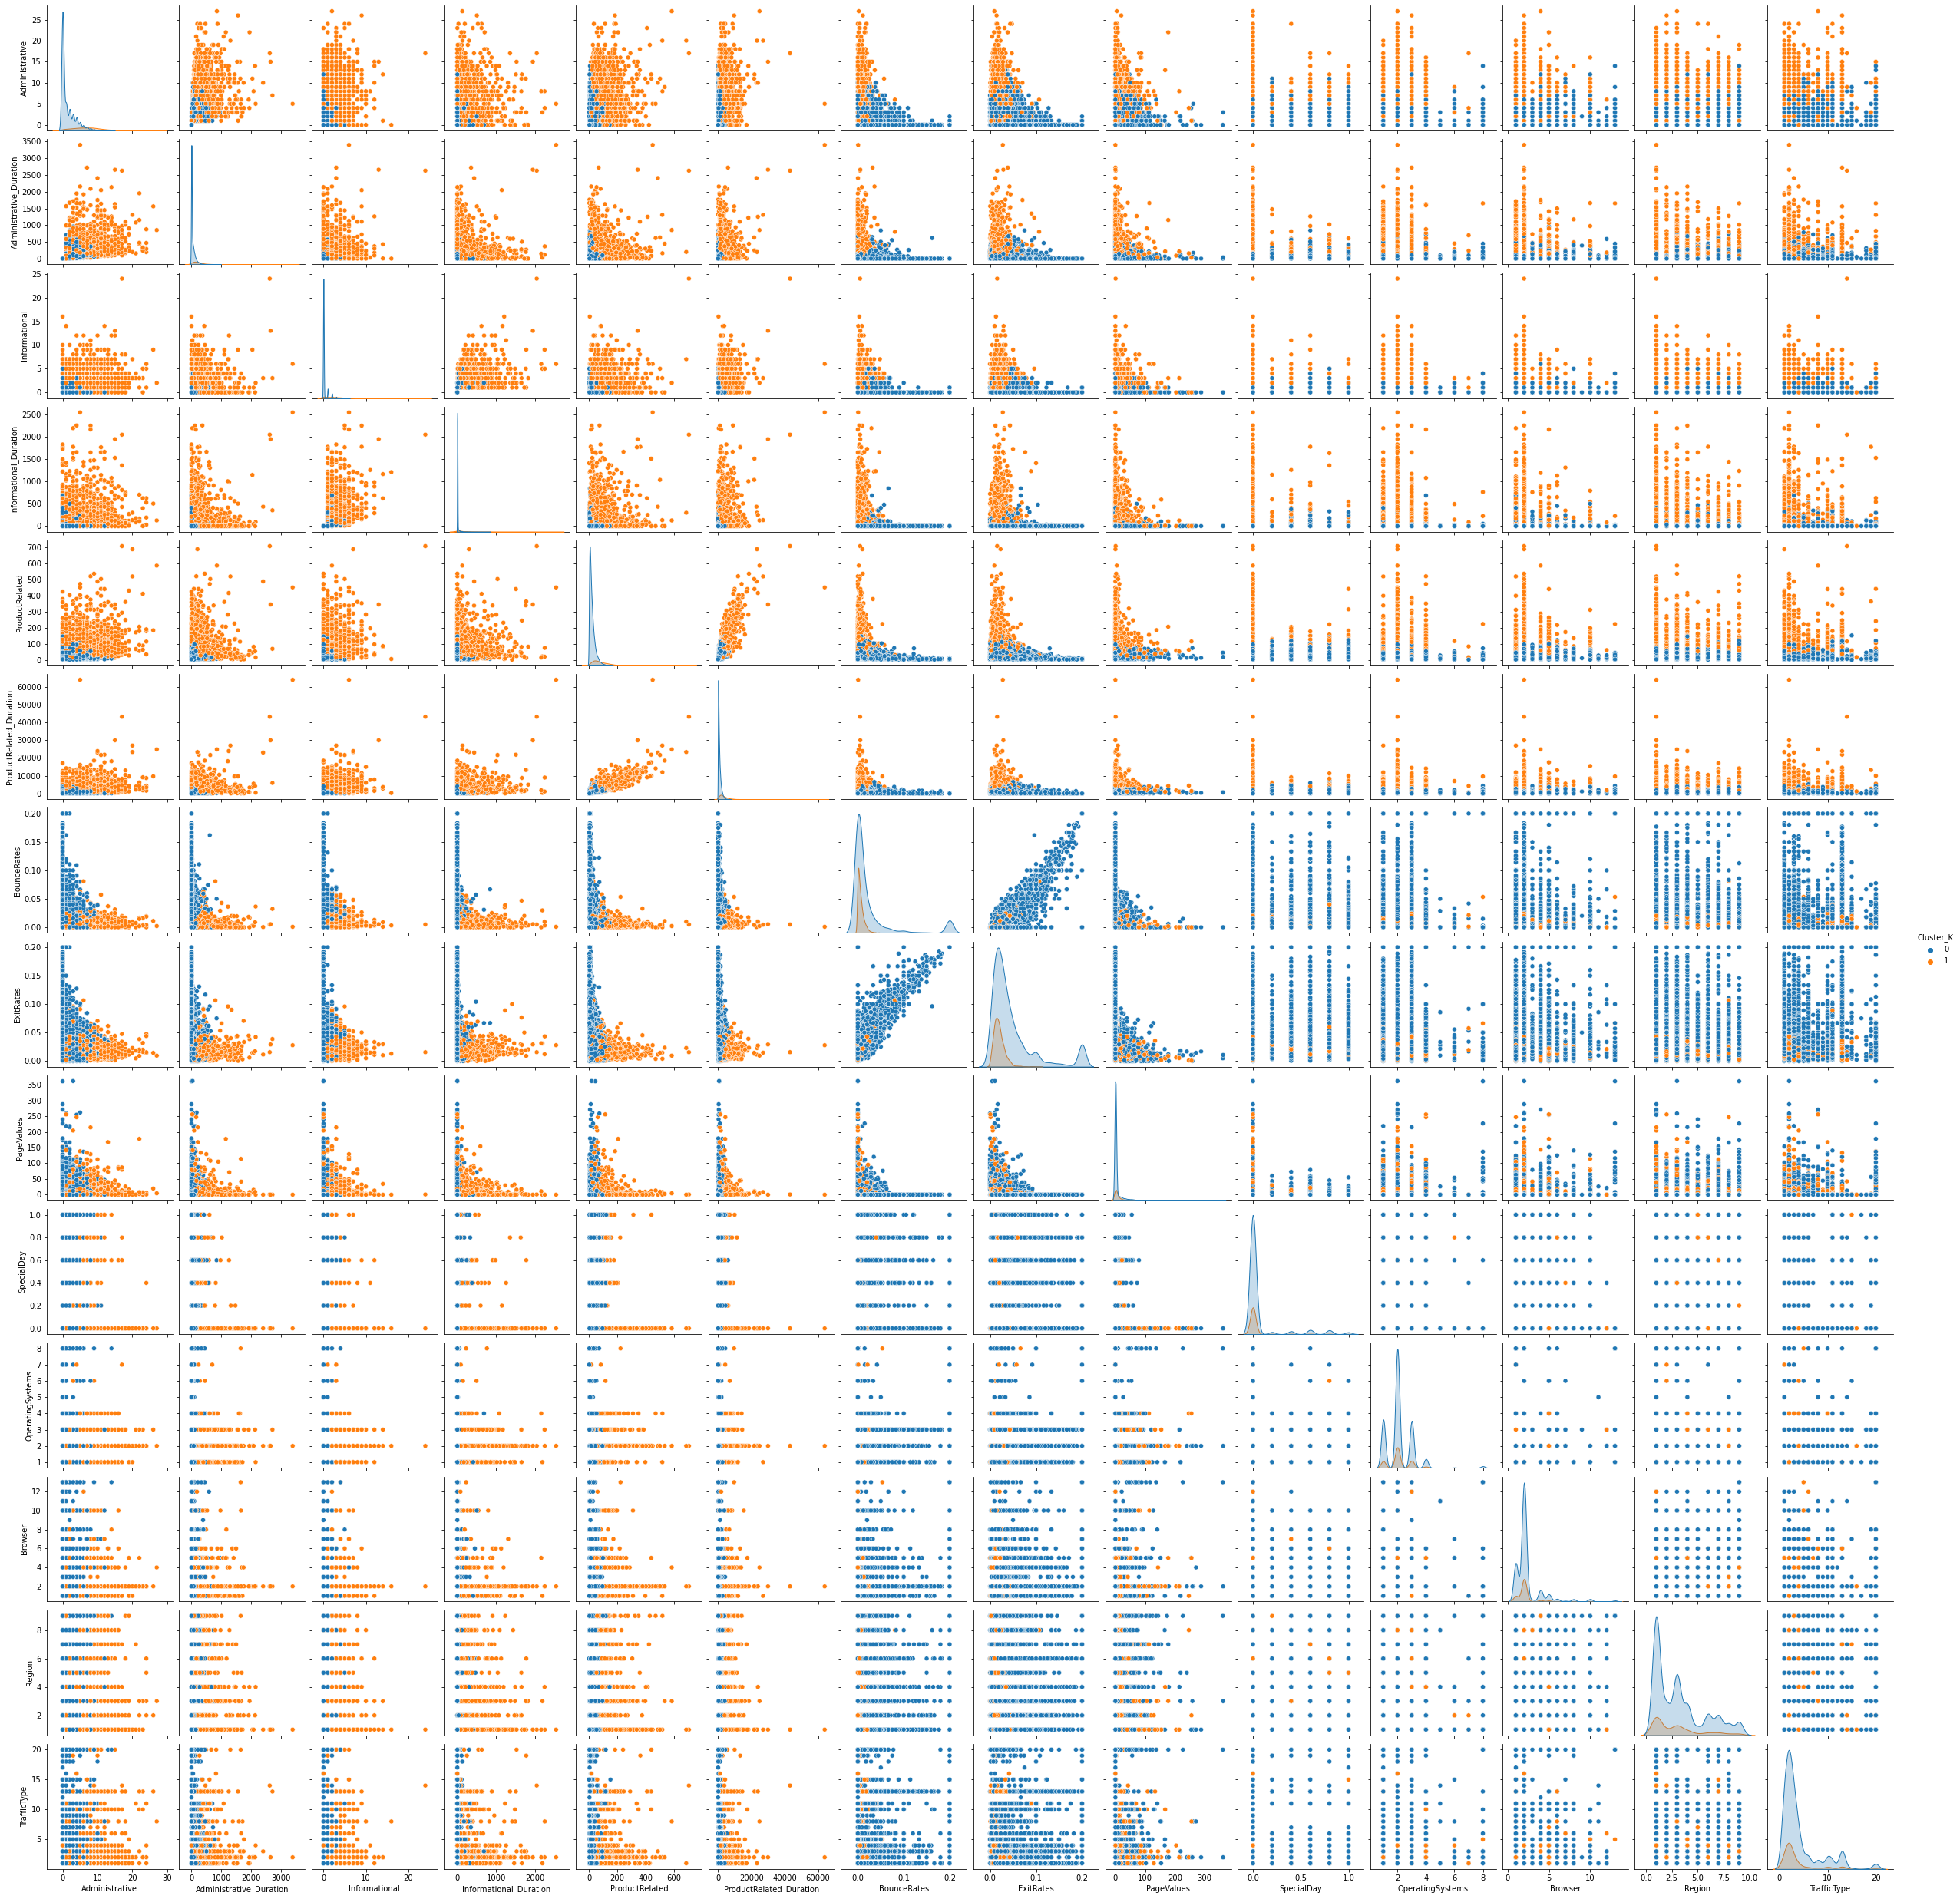

In [175]:
sns.pairplot(data=df1,palette='tab10',  hue= 'Cluster_K')
plt.show()

**Interpretation** We can see scatter plots after K Means clustering and looking good 

In [186]:
db_scan = DBSCAN(eps = 0.7, min_samples = 40)
model = db_scan.fit(X)
set(model.labels_)

{-1, 0, 1}

Interpretation : We can see 2 clusters and one outlier cluster(-1) and this data taken with out removing outliers

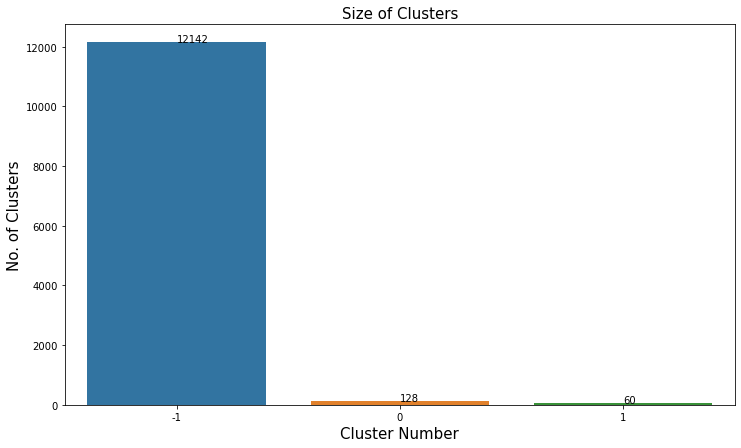

In [187]:
df_final['Cluster_DB'] = model.labels_
clusters = df_final['Cluster_DB'].value_counts().index
count = df_final['Cluster_DB'].value_counts().values
sns.countplot(data = df_final, x = 'Cluster_DB')
# plt.bar(x = clusters, height = count)
for i in range(3):
    plt.text(x = clusters[i]+1, y = count[i] + 2, s = count[i])
plt.title('Size of Clusters', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 15)
plt.ylabel('No. of Clusters', fontsize = 15)
plt.show()

**Interpretation** We can see that as the data already having huge outliers DB SCAN algorithm predicted most of the observations as outliers, so DB SCAN is not good one for this data set

# Hierarchical Clustering

**Let us first calculate the linkage matrix.**

In [111]:
link_mat = linkage(X, method = 'ward')     
print(link_mat[0:10])

[[8.5000e+01 1.5800e+02 0.0000e+00 2.0000e+00]
 [1.3200e+02 1.5900e+02 0.0000e+00 2.0000e+00]
 [1.7800e+02 1.2331e+04 0.0000e+00 3.0000e+00]
 [2.6190e+03 3.8910e+03 0.0000e+00 2.0000e+00]
 [1.5760e+03 1.6080e+03 0.0000e+00 2.0000e+00]
 [3.9800e+02 1.1760e+03 0.0000e+00 2.0000e+00]
 [2.0570e+03 1.2335e+04 0.0000e+00 3.0000e+00]
 [1.9310e+03 2.0610e+03 0.0000e+00 2.0000e+00]
 [4.6800e+02 6.5900e+02 0.0000e+00 2.0000e+00]
 [3.3000e+02 4.8300e+02 0.0000e+00 2.0000e+00]]


Plot the dendrogram using the above linkage matrix.

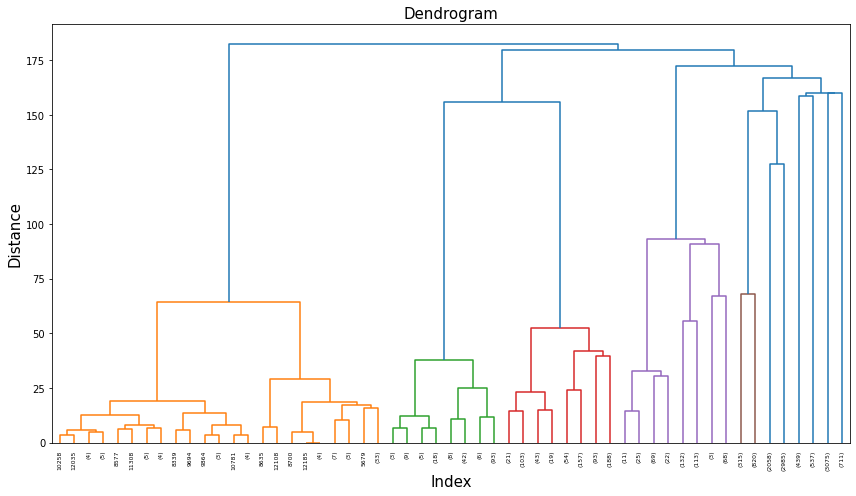

In [131]:
dendro = dendrogram(link_mat, truncate_mode='level', p=5)
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.tight_layout()
plt.show()

Use the `AgglomerativeClustering()` to build the 2 clusters with the `ward` linkage method.

In [139]:
hierar_clusters = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
hierar_clusters.fit(X)
df_final['Cluster_AgC'] = hierar_clusters.labels_
df_final.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               0                 0.000000              0   
2               0                 0.000000              0   
3               0                 0.000000              0   
4               0                 0.000000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                0.000000               1                 0.000000   
1                0.000000               2                64.000000   
2                0.000000               1                 0.000000   
3                0.000000               2                 2.666667   
4                0.000000              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Mar  Month_May  \
0     0.200000   0.200000    0.000000    0.000000  ...          0          0   
1     0.000000   0.100000    0.000000    0.000000  ...          0          0   
2     0.200000   0.200000    0.000000    0.000000  ...          0          0   
3     0.050000   0.140000    0.000000    0.000000  ...          0          0   
4     0.020000   0.050000    0.000000    0.000000  ...          0          0   

   Month_Nov  Month_Oct  Month_Sep  VisitorType_Other  \
0          0          0          0                  0   
1          0          0          0                  0   
2          0          0          0                  0   
3          0          0          0                  0   
4          0          0          0                  0   

   VisitorType_Returning_Visitor  Weekend_1  Cluster_K  Cluster_AgC  
0                              1          0          0            0  
1                              1          0          0            0  
2                              1          0          0            0  
3                              1          0          0            0  
4                              1          1          0            0  

[5 rows x 28 columns]

In [135]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [140]:
df_final['Cluster_AgC'].value_counts()

0    12245
1       85
Name: Cluster_AgC, dtype: int64

In [144]:
hierar_clusters = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
hierar_clusters.fit(X)
np.unique(hierar_clusters.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([11383,    85,   862], dtype=int64))

**Interpretation** We can see the difference in misclassied counts for 2 optimal clusters but in 3 optimal clusters the model bit better, so we can say KMeans algorithm is better by comparing to AgglomerativeClustering 

## PCA

In [145]:
df_feature = df_final.drop(['Cluster_K', 'Cluster_AgC'], axis = 1)
df_feature.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               0                 0.000000              0   
2               0                 0.000000              0   
3               0                 0.000000              0   
4               0                 0.000000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                0.000000               1                 0.000000   
1                0.000000               2                64.000000   
2                0.000000               1                 0.000000   
3                0.000000               2                 2.666667   
4                0.000000              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0     0.200000   0.200000    0.000000    0.000000  ...          0           0   
1     0.000000   0.100000    0.000000    0.000000  ...          0           0   
2     0.200000   0.200000    0.000000    0.000000  ...          0           0   
3     0.050000   0.140000    0.000000    0.000000  ...          0           0   
4     0.020000   0.050000    0.000000    0.000000  ...          0           0   

   Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  VisitorType_Other  \
0          0          0          0          0          0                  0   
1          0          0          0          0          0                  0   
2          0          0          0          0          0                  0   
3          0          0          0          0          0                  0   
4          0          0          0          0          0                  0   

   VisitorType_Returning_Visitor  Weekend_1  
0                              1          0  
1                              1          0  
2                              1          0  
3                              1          0  
4                              1          1  

[5 rows x 26 columns]

### Covariance Matrix

In [146]:
cov_mat = np.cov(X_scaled.T)
print(cov_mat[0:5])

[[ 1.00008111  0.60163214  0.376881    0.25586889  0.43115431  0.37396934
  -0.22358076 -0.31650867  0.09899761 -0.09478528 -0.00634758 -0.0250366
  -0.00548725 -0.03356343 -0.01444419 -0.06565396  0.0062215  -0.00190254
  -0.05504008 -0.06459222  0.05157859  0.0912733   0.05961135 -0.02118611
  -0.02288568  0.02641889]
 [ 0.60163214  1.00008111  0.30273426  0.2380501   0.28911007  0.35545078
  -0.1441821  -0.20581445  0.06761396 -0.07330967 -0.00734401 -0.01539278
  -0.00556101 -0.0143776  -0.00499046 -0.04452756 -0.00209594 -0.01897587
  -0.02320002 -0.03932101  0.03243421  0.05510527  0.0313159  -0.00854245
  -0.02252635  0.01499136]
 [ 0.376881    0.30273426  1.00008111  0.61900506  0.37419464  0.38753674
  -0.11612303 -0.16367934  0.04863564 -0.04822317 -0.00952744 -0.03823778
  -0.029171   -0.03449355  0.00282215 -0.04037566  0.00189575  0.00717612
  -0.02795883 -0.03842469  0.06375909 -0.00261905  0.00969282 -0.0214587
   0.05740366  0.03578763]
 [ 0.25586889  0.2380501   0.6190

In [147]:
eig_val,eig_vec=np.linalg.eig(cov_mat)
print('Eigenvalues:','\n','\n', eig_val,"\n")
print('Eigenvectors:','\n','\n',eig_vec[:5],'\n')

Eigenvalues: 
 
 [3.48531708 1.95879485 1.78599782 0.04289047 0.07571928 0.12210046
 1.63797085 0.34964724 0.41845675 1.33084041 0.56527945 0.57580653
 0.74912388 0.78251385 0.84142876 1.15923886 1.13688305 1.09713297
 0.91118109 0.93687352 0.94676487 0.97033069 0.99446868 1.05091484
 1.04481203 1.03162057] 

Eigenvectors: 
 
 [[ 3.73640256e-01 -1.05029536e-02 -5.00686036e-02  6.80046293e-03
   3.21465205e-02  1.63235114e-01 -2.15552776e-02 -4.61306461e-01
  -5.73792037e-01  1.57090058e-01  5.84250803e-02  2.19535636e-02
  -4.57690645e-02  1.54587733e-01 -1.68149918e-02  1.75827114e-01
   2.10810011e-01 -1.08330706e-01 -1.50507049e-01  2.92489273e-01
  -1.01460861e-01  2.38851435e-02  1.47149075e-01  6.03032886e-02
   3.24874829e-02  1.39174502e-02]
 [ 3.18808133e-01 -3.17702306e-02 -8.01132490e-02  3.19613177e-03
   1.73985276e-02 -1.44037920e-01  3.24494922e-03  3.09456453e-01
   5.55384052e-01  2.03004239e-01  6.96532294e-02  1.68399749e-03
  -1.40905168e-02  1.96662039e-01 -1.30915

#### Decide Number of Principal Components

In [148]:
eig_val=list(eig_val)
eig_val.sort(reverse=True)
print(eig_val)

[3.4853170753500677, 1.9587948532013826, 1.7859978168451496, 1.6379708540759081, 1.3308404061181212, 1.1592388645058127, 1.1368830479623897, 1.097132966948546, 1.0509148371820647, 1.0448120314706657, 1.0316205715984719, 0.9944686846087952, 0.9703306908918975, 0.9467648712613351, 0.9368735242040318, 0.9111810902045998, 0.8414287554508092, 0.7825138514319792, 0.7491238780161152, 0.5758065315331364, 0.5652794463653265, 0.41845674907281044, 0.3496472438886797, 0.12210046047753477, 0.0757192813578027, 0.04289046503164804]


Here the first 11 eigenvalues are greater than 1.Thus we can consider 11 principal components using kaiser criterion.

### PCA using python Library

In [155]:
from sklearn.decomposition import PCA
pca_11 = PCA(n_components = 11, random_state = 10)
components = pca_11.fit_transform(X_scaled)
pca_11.explained_variance_ratio_

array([0.13403978, 0.07533192, 0.06868659, 0.06299373, 0.051181  ,
       0.04458214, 0.04371841, 0.04216494, 0.04041494, 0.04017249,
       0.03966127])

In [156]:
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
df_pca.head()

PC1       PC2       PC3      PC4       PC5       PC6       PC7  \
0 -3.616492 -3.441700  0.351953 2.805045  0.682773  1.700204 -1.534035   
1 -1.846667 -1.133015 -0.695621 0.482955  0.085978  0.295530 -2.126197   
2 -3.771055 -1.991424  2.268863 2.716892  0.742650  0.959967 -1.048949   
3 -2.460341 -1.277197  0.480226 1.148799  0.168690  0.373154 -1.688335   
4 -1.409744 -0.453938 -0.182027 0.259490 -0.267938 -0.259857 -1.498625   

        PC8       PC9      PC10     PC11  
0 -0.609993 -2.930768 -0.253717 5.743282  
1 -0.889233 -2.736042 -0.618945 5.919755  
2 -1.388992 -2.264455  0.035157 5.802915  
3 -0.982818 -2.696448 -0.546420 5.922249  
4 -0.299206 -2.128845 -0.395402 6.133688

In [158]:
from sklearn.model_selection import train_test_split
df_target = df['Revenue']
xtrain,xtest,ytrain,ytest=train_test_split(X,df_target,test_size=0.2,random_state=10,stratify=df_target)

In [159]:
from sklearn.tree import DecisionTreeClassifier
def DT_model_run(xtrain, xtest, ytrain, ytest):

    df_dt = DecisionTreeClassifier(random_state = 10)
    df_dt.fit(xtrain, ytrain)
    y_pred_train = df_dt.predict(xtrain)
    y_pred_test = df_dt.predict(xtest)
    print('Accuracy on train set: ', accuracy_score(ytrain, y_pred_train))
    print('Accuracy on test set: ', accuracy_score(ytest, y_pred_test))

In [166]:
pca=PCA(n_components=11,random_state=10)
xtrain_pca_11=pca.fit_transform(xtrain)
xtest_pca_11=pca.fit_transform(xtest)

In [167]:
pca=PCA(n_components=16,random_state=10)
xtrain_pca_16=pca.fit_transform(xtrain)
xtest_pca_16=pca.fit_transform(xtest)

In [164]:
%%time
DT_model_run(xtrain,xtest,ytrain,ytest)

Accuracy on train set:  1.0
Accuracy on test set:  0.8682076236820763
Wall time: 89.4 ms


In [168]:
%%time
DT_model_run(xtrain_pca_11,xtest_pca_11,ytrain,ytest)

Accuracy on train set:  1.0
Accuracy on test set:  0.7108678021086781
Wall time: 153 ms


In [169]:
%%time
DT_model_run(xtrain_pca_16,xtest_pca_16,ytrain,ytest)

Accuracy on train set:  1.0
Accuracy on test set:  0.7226277372262774
Wall time: 269 ms


The test accuracy is very less for both 11 and 16 components when coparing original data test accuracy. So we can tell that PCA cannot be applied on the data since there is no multicollinearity in the original data itself.

**Conclusion:** We can conclude that KMeans clustering fits better to the data.